In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('test3.csv')
df.head(5).T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
except_column = ['MonthlyCharges', 'customerID', 'TotalCharges']
columns = df.columns
for column in columns:
    if column in except_column: continue
    print(column +' :', set(df[column]))

# tenure는 보유한 연수를 의미하는 듯 하다.(회사의 제품을 사용한 기간? 70개월 or ?)

gender : {'Female', 'Male'}
SeniorCitizen : {0, 1}
Partner : {'No', 'Yes'}
Dependents : {'No', 'Yes'}
tenure : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
PhoneService : {'No', 'Yes'}
MultipleLines : {'Yes', 'No', 'No phone service'}
InternetService : {'DSL', 'Fiber optic', 'No'}
OnlineSecurity : {'No', 'No internet service', 'Yes'}
OnlineBackup : {'No', 'No internet service', 'Yes'}
DeviceProtection : {'No', 'No internet service', 'Yes'}
TechSupport : {'No', 'No internet service', 'Yes'}
StreamingTV : {'No', 'No internet service', 'Yes'}
StreamingMovies : {'No', 'No internet service', 'Yes'}
Contract : {'One year', 'Two year', 'Month-to-month'}
PaperlessBilling : {'No', 'Yes'}
PaymentMethod : {'Mailed check', 'Bank transfer (automatic)', 'Credit card

In [5]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: 0 if x == ' ' else x)

In [6]:
df[df['InternetService']=='No']['OnlineSecurity'].value_counts() 
df[df['InternetService']=='No']['OnlineBackup'].value_counts() 
# InternetService와 연동되는 column이 많다.
# OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies

OnlineBackup
No internet service    1526
Name: count, dtype: int64

In [7]:
df[df['tenure'] == 0].head().T

,488,753,936,1082,1340
customerID,4472-LVYGI,3115-CZMZD,5709-LVOEQ,4367-NUYAO,1371-DWPAZ
gender,Female,Male,Female,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes
Dependents,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No
MultipleLines,No phone service,No,No,Yes,No phone service
InternetService,DSL,No,DSL,No,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes


In [8]:
df[df['Churn']=='Yes'].iloc[2]

customerID                9305-CDSKC
gender                        Female
SeniorCitizen                      0
Partner                           No
Dependents                        No
tenure                             8
PhoneService                     Yes
MultipleLines                    Yes
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                 Yes
TechSupport                       No
StreamingTV                      Yes
StreamingMovies                  Yes
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 99.65
TotalCharges                   820.5
Churn                            Yes
Name: 5, dtype: object

In [9]:
df['TotalCharges']= df['TotalCharges'].astype(float)

In [10]:
df[df['StreamingTV'] == 'Yes'].T

,5,6,8,12,13,14,15,17,26,28,...,7023,7027,7028,7029,7034,7035,7036,7038,7039,7042
customerID,9305-CDSKC,1452-KIOVK,7892-POOKP,8091-TTVAX,0280-XJGEX,5129-JLPIS,3655-SNQYZ,9959-WOFKT,6467-CHFZW,5248-YGIJN,...,1035-IPQPU,0550-DCXLH,9281-CEDRU,2235-DWLJU,0639-TSIQW,8456-QDAVC,7750-EYXWZ,6840-RESVB,2234-XADUH,3186-AJIEK
gender,Female,Male,Female,Male,Male,Male,Female,Male,Male,Male,...,Female,Male,Female,Female,Female,Male,Female,Male,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
Partner,No,No,Yes,Yes,No,No,Yes,No,Yes,Yes,...,Yes,No,Yes,No,No,No,No,Yes,Yes,No
Dependents,No,Yes,No,No,No,No,Yes,Yes,Yes,No,...,No,No,No,No,No,No,No,Yes,Yes,No
tenure,8,22,28,58,49,25,69,71,47,72,...,63,13,68,6,67,19,12,24,72,66
PhoneService,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes
MultipleLines,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,Yes,No,No,No phone service,Yes,No,No phone service,Yes,Yes,No
InternetService,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,DSL,...,Fiber optic,DSL,DSL,DSL,Fiber optic,Fiber optic,DSL,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,No,No,No,No,Yes,Yes,Yes,No,Yes,...,No,No,No,No,Yes,No,No,Yes,No,Yes


In [11]:
# df['StreamingMovies'] = df['StreamingMovies'].apply(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else x)
baseinfo = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']
internetService = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
phoneservice = ['PhoneService', 'MultipleLines']
paymentmethodandcharge = ['Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [12]:
set(df['StreamingMovies'])

{'No', 'No internet service', 'Yes'}

In [26]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
internet_df = df[df['InternetService'] != 'No'][baseinfo + internetService]
phone_df = df[df['PhoneService'] == 'Yes'][baseinfo + phoneservice]
payment_df = df[baseinfo + paymentmethodandcharge]


In [30]:
internet_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,1,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,34,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes,11,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,Male,1,Yes,No,4,Fiber optic,No,No,No,No,No,No


In [32]:
df[df['Contract'] == 'One year'][df['tenure']==1].T

C:\Users\405-11\AppData\Local\Temp\ipykernel_12800\1423114646.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Contract'] == 'One year'][df['tenure']==1].T


,222,1168,1286,1654,2993,4767,6149
customerID,6469-MRVET,5562-BETPV,8985-OOPOS,2967-MXRAV,2239-CFOUJ,1064-FBXNK,3069-SSVSN
gender,Male,Male,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0,0,0
Partner,Yes,Yes,No,Yes,Yes,Yes,No
Dependents,Yes,Yes,No,Yes,Yes,Yes,No
tenure,1,1,1,1,1,1,1
PhoneService,Yes,Yes,Yes,Yes,Yes,Yes,No
MultipleLines,No,No,No,No,No,No,No phone service
InternetService,No,No,DSL,No,No,No,DSL
OnlineSecurity,No internet service,No internet service,No,No internet service,No internet service,No internet service,No


#### Business Understanding
- 고객의 인원 수가 중요 -> 신규 고객 유치와 기존 고객의 이탈을 방지 병행
- 고객 이탈과 관련된 요소를 파악
- 유사한 특징을 보이는 고객 그룹-> 그룹별 이탈률을 알아보자 -> 이탈률이 놓은 그룹을 집중 관리 하고자 함

#### 빈 값 처리 방법(NULL 처리)
- 그냥 지우기 : 비율이 적을 때 사용(지워도 크게 다라지지 않을때)
- 도메인 지식을 이용해 채워넣기 : 패턴이 있는 경우, 논리적인 근거가 있는 경우
- 평균 대체법 : 평균값으로 대체하기 경우의 수는 'other'로 채우기, 숫자로 바꿀 수 있다면 그 평균을 넣어보자
- 해당 column을 label로 두고 ML이 학습해서 예측하여 넣기

In [35]:
# SeniorCitizen의 값은 0과 1인데 TotalCharges가 비었으면 Senior는 항상 0이다.
# 대표성이 있는가?
# describe를 써볼경우 평균이 0.16이다. 따라서 0이 압도적으로 많다. 0은 대표성이 될수 없다
# Dependents == YES 또한 매우 많으며 total이 채워져 있다.
# tenure? 맞다 대표성이 있음

# 고객의 이탈률은 26% 정도
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [37]:
df['Churn_num'] = df['Churn'].apply(lambda x: 0 if x == 'No' else 1)

In [39]:
# df['Churn_num'] = df['Churn'].apply(lambda x : 1 if x == 'Yes' else 0)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [41]:
import numpy as np

In [43]:
te_ch = df.groupby('tenure').agg({
    'Churn_num':'mean',
    'SeniorCitizen':'mean',
    'Dependents_num':'mean',
    'PhoneService_num':'mean',
    'InternetService_num':'mean',
}).reset_index()

KeyError: "Column(s) ['Dependents_num', 'InternetService_num', 'PhoneService_num'] do not exist"

In [ ]:
# 도수 분포표
te_ch

In [ ]:
sns.barplot(data=te_ch, x='tenure', y='Churn_num')
sns.scatterplot(data=te_ch, x='tenure', y='Dependents_num')



In [47]:
sns.barplot(data=te_ch, x='tenure', y='Churn_num')
sns.scatterplot(data=te_ch, x='tenure', y='PhoneService_num')


NameError: name 'sns' is not defined

In [49]:
sns.barplot(data=te_ch, x='tenure', y='Churn_num')
sns.scatterplot(data=te_ch, x='tenure', y='SeniorCitizen')



NameError: name 'sns' is not defined

In [51]:
sns.barplot(data=te_ch, x='tenure', y='Churn_num')
sns.lineplot(data=te_ch, x='tenure', y='InternetService_num')
sns.

SyntaxError: invalid syntax (4095739659.py, line 3)

In [53]:
import seaborn as sns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [54]:
# 계약 기간이 길어지면 이탈률이 감소된다.
# 이것은 어떤 칼럼에 영향을 받는가?


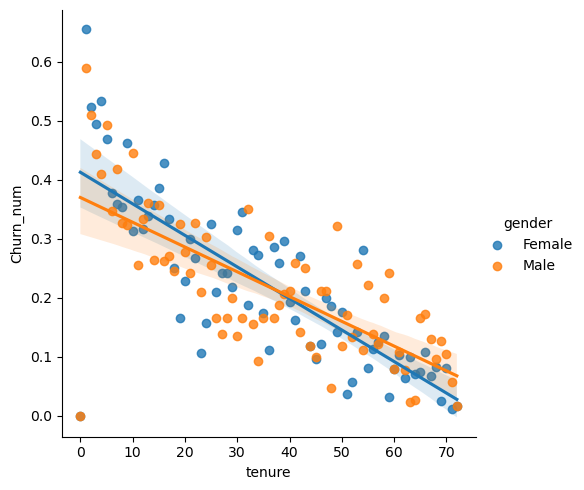

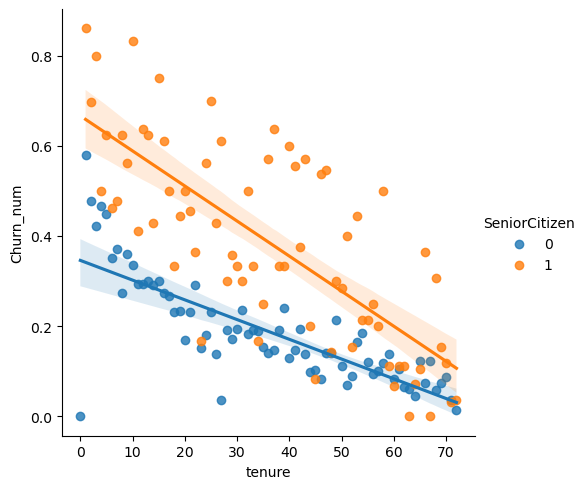

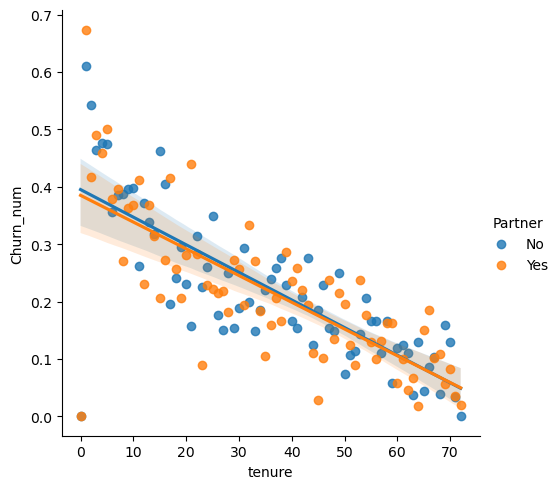

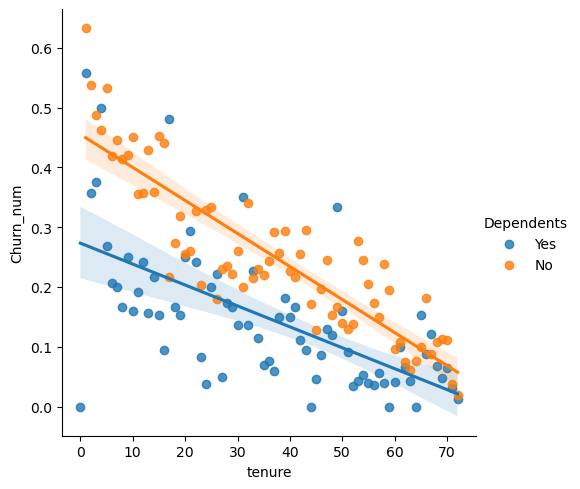

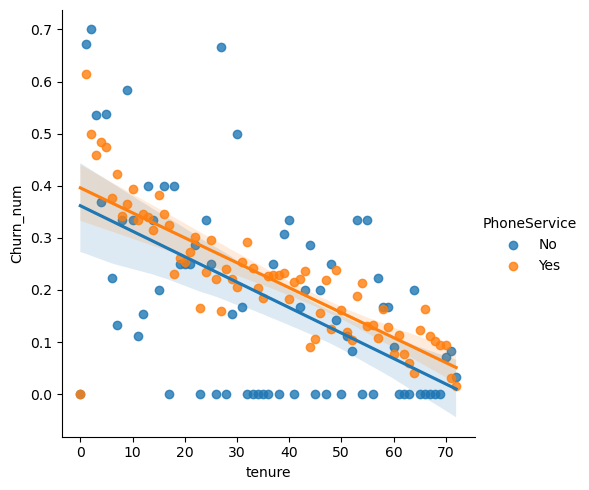

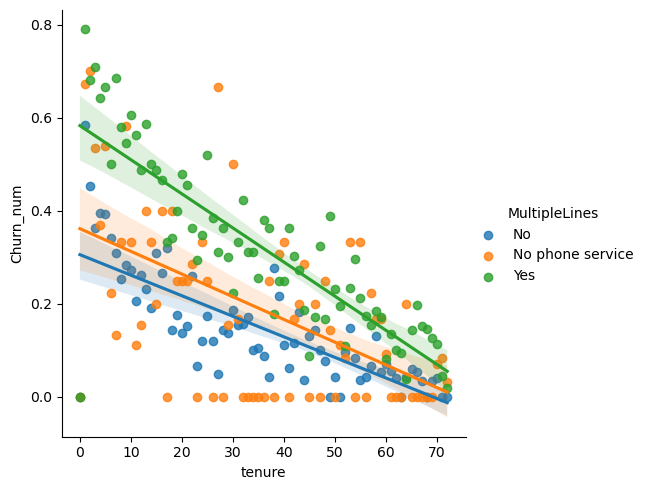

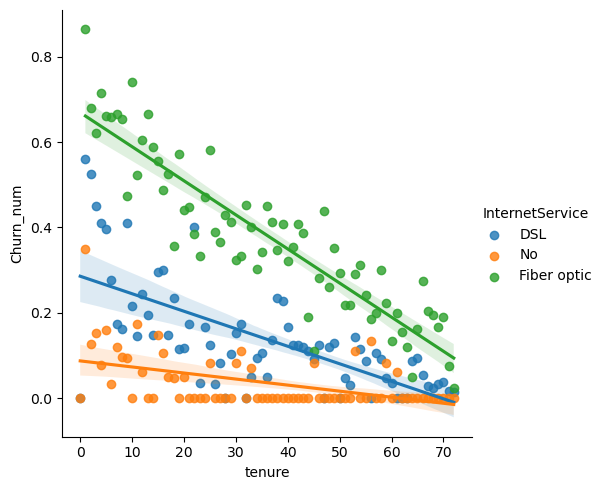

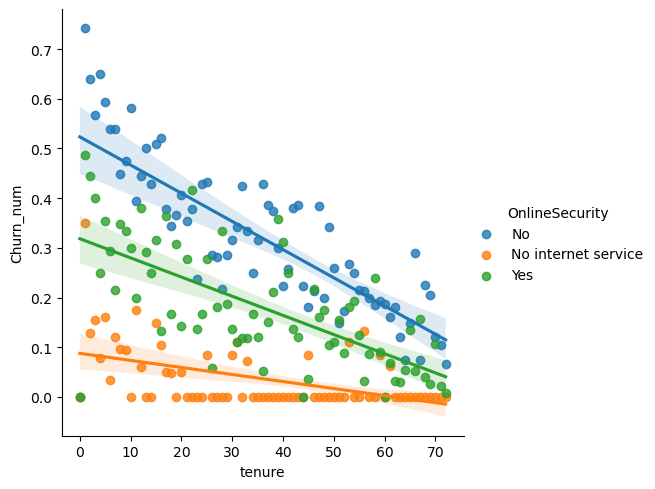

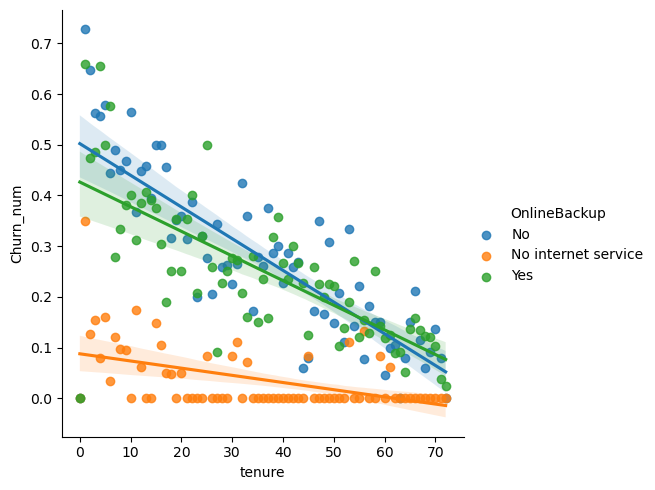

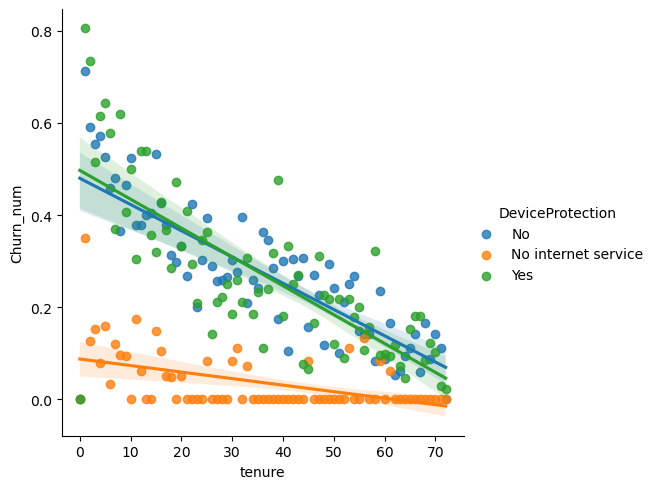

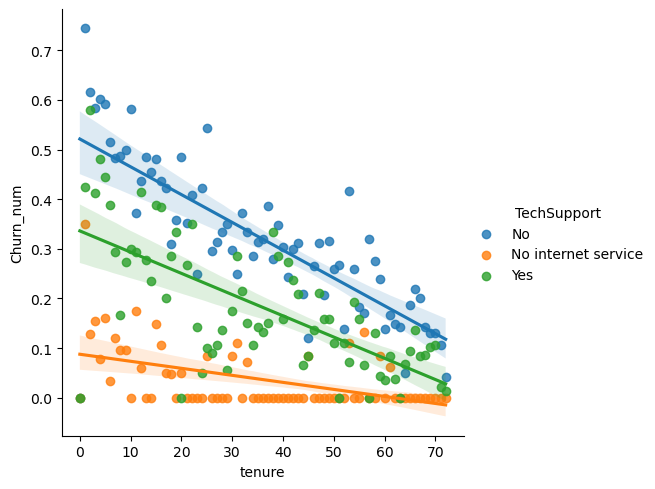

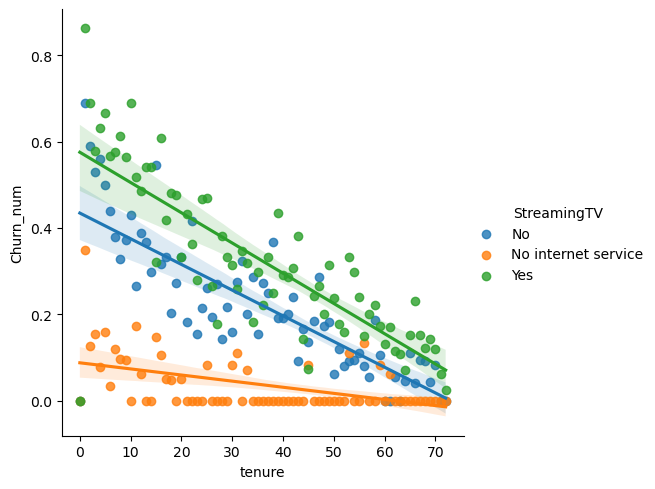

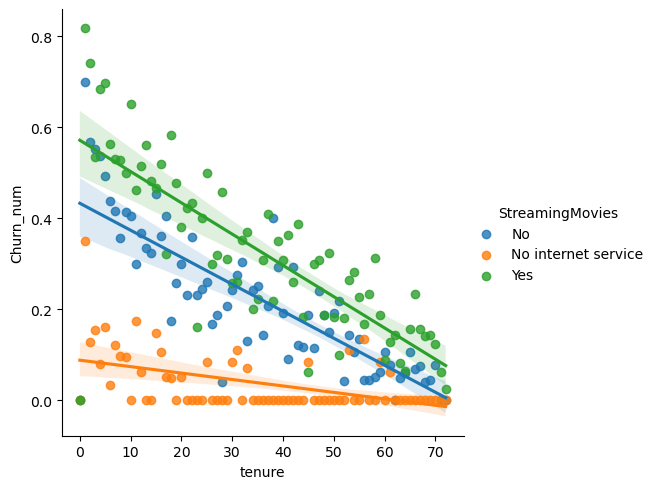

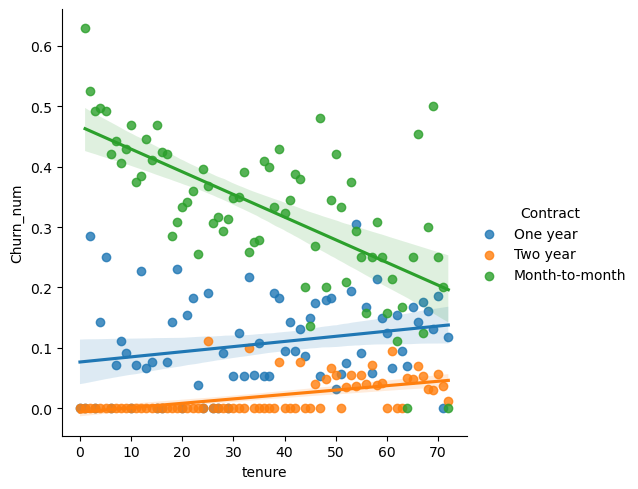

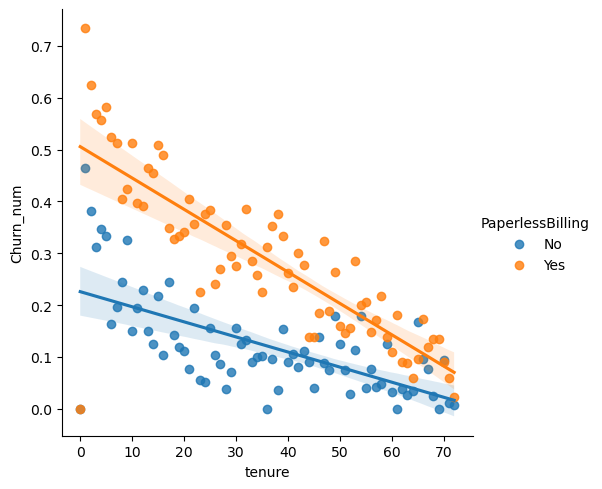

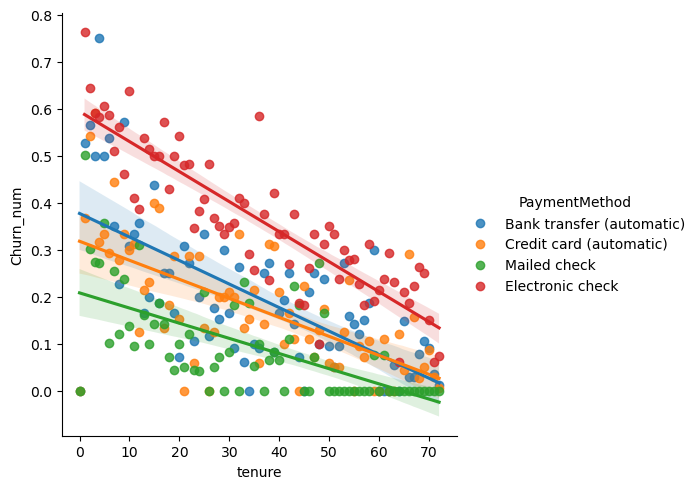

In [55]:
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
for hue in columns:
    te_ch= df.groupby(by=['tenure', hue]).agg({'Churn_num':'mean'}).reset_index()
    sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue )
    


# 부양 가족이 있을 경우 취소율이 조금 낮은 것으로 보인다
# 파트너 경우에는 둘이 비슷한 분포율을 보인다
# 전화 서비스에 경우 큰 의미는 없어 보인다
# 다중 회선을 사용할 경우 이탈률이 높습니다.(초반 집중관리 필요)

# 광섬유에 경우 이탈률이 높음
# 온라인 보안은 사용하지 않을 경우 이탈률이 높다(적극 권장할 것)
# 온라인 백업은 쓰든 안쓰든 이탈률이 비슷하다
# 장치보호에도 이탈률이 비슷함
# 기술지원은 사용하지 않을 경우 이탈률이 높다(적극 권장)
# 2년 예약일 경우 이탈률이 매우 낮다, 1년 계약도 낮은 편이다
# 결재 갱신 주기가 짧아 질 수록 이탈률이 높아지는 경향이 있다.
# 통지서가 paperless일 경우 이탈률이 더 높다

# 결재 방법에 경우 지로 통지서가 이탈률이 가장 낮음
# 자동 결재 시스템은 중간 이탈률을 가짐
# 전자 통지서는 가장 이탈률이 높다.

In [56]:
df.loc[df['tenure'] == 32]['PhoneService'].value_counts()
# 32 개월에서 전화 서비스를 사용하지 않은 사람의 비율은 압도적으로 Yes다. 
# 하지만 전화를 쓰지 않는 사람들 중에 탈퇴를 하지 않았을 경우 소수여도 이탈률이 극도로 낮은 집단으로 통계된다.
# 이상할 정도로 높은 비율을 가진 데이터는 직접 열어 숫자를 확인해 보는 작업이 필요하다

PhoneService
Yes    65
No      4
Name: count, dtype: int64

#### 공통특징
- 계약 기간이 잛을 경우 이탈률이 높음
- 성별, 독신에 따라 이탈률의 큰 차이는 없음
- 전화 서비스, 온라인 백업, 기기보호 서비스 사용여부는 이탈률의 큰 차이가 없었음

#### 고객정보 기반
- 부양 가족이 없는 경우 이탈률이 더 높아짐

#### 서비스 종류 기반
- 다중회선, 스트리밍 서비스를 쓸경운 이탈률이 높아짐
- 온라인 보안 서비스와 기술지원 서비스를 사용하지 않을 경우 이탈률이 높아짐
- 

#### 계약정보 기반
- 결재 갱신 주기가 짧을 수록 이탈률이 높아짐
- 계약기간이 길어짐에 따라 이탈률이 감소한다는 특징이 유지되지 않음
- 통지서가 paperless일 경우 이탈률이 높아짐
- 결제 지불 방식의 순서대로 이탈률이 높아짐

### Data Preparation
- outlier
- scaling
- 경우의 수 column 처리
- 교차 검증


#### 이상치(Outlier)
- 기준을 정해서 기준선 밖에 있으면 이상치로 판단

#### 기준을 정하는 방법
- 평균에서 n표준편차 이상 떨어진 것을 이상치라 판단
- 이상치가 포함된 데이터는 신뢰할 수 없음(이상치가 엄청 큰 값이 들어있을 수 있음)
- 평균으로부터 엄청 크거나 작은 값이 있는데, 이에 대한 경우의 수가 적으면 평균과 표준편차의 의미가 퇴색됨
- 에초에 평균을 구할 때부터 이상치가 있으면 평균을 구할 때 잘못된 평균을 구하게됨

#### 대표적인 이상치 처리 방법
- IQR, MAD, MCOD, Hoteling's T2, SPE...

#### 식별된 이상치가 있는 경우 대처법
- 경우의 수가 적으면 -> 지움
- 경계선의 값으로 대체 -> Winsorize
- Business Understanding에서 설정한 방향성이 이상치 탐지인 경우 label등



#### IQR(Inter Quartile Range)
- iqr : 1.5 * (75% - 25%)
- Inter : a와 b의 사이
- Quartile : 크기 순으로 정렬했을 때, 4분할 하여 25%, 75% 지점에 해당하는 등수
- Range : 25%와 75%의 값에서 IQR을 빼고 더햇을 때 나타나는 범위


In [112]:
desc = df.describe()['MonthlyCharges']

In [114]:
iqr = 2.5 * (desc['75%'] - desc['25%'])
upper_lim = desc['75%'] + iqr
lower_lim = desc['25%'] - iqr
print(iqr, upper_lim, lower_lim)

135.875 225.725 -100.375


In [63]:
df[df['TotalCharges'] > upper_lim]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num


In [66]:
df[df['TotalCharges']<lower_lim]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num


In [67]:
df.describe()['TotalCharges']

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [68]:
# 평균으로 부터 표준편차 2.5에 해당하는 값들의 합을 구하시오
upper_lim = desc['mean'] + (2.5 * desc['std'])
lower_lim = desc['mean'] - (2.5 * desc['std'])

print(upper_lim, lower_lim)

sum(df.loc[(df['TotalCharges']>upper_lim) | (df['TotalCharges']<lower_lim)]['TotalCharges'])

7946.720477786371 -3387.251870658726


740692.15

#### scaling
- 변수의 범위를 조절하는 것
- 단위가 큰 column이 단위가 작은 column에 비해 삭습 단계에서 미치는 영향이 큰 경우
- 이 영향을 최소화 하기 위해 scaling함
- 그래프 그릴 때, 같은 축(y축)을 공유해서 시각화 하는 경우
- 자릿수가작아야 속도가 빠른 경우 예) 이미지 DL, SVM

#### scaling 종류
- min - max : 최소값을 0으로 최대값을 1로하는 방법, 가장 쉽다. 근데 이상치 있으면 폭망 : 최소값을 빼주고 최대값으로 나누면 0~1까지 값으로 바꿀 수 잇다.
- standard : 표준편차를 이용하는 방식, 평균을 0, 표준편차를 1
- robust : 중간값을 0 , IQR을 1로
- 이상치에 미치는 영향도 : min-max , standard, robust 순으로 영향을 받는다.

In [132]:
# min - max scaling
min = df['TotalCharges'].min()
max = df['TotalCharges'].max()

df['TotalCharges_mm'] = df['TotalCharges'].apply(lambda x: (x-min)/max)

In [134]:
df.describe()[['TotalCharges', 'TotalCharges_mm']]

,TotalCharges,TotalCharges_mm
count,7043.000000,7043.000000
mean,2279.734304,0.262497
std,2266.794470,0.261007
min,0.000000,0.000000
25%,398.550000,0.045891
50%,1394.550000,0.160574
75%,3786.600000,0.436003
max,8684.800000,1.000000


In [136]:
df[['TotalCharges', 'TotalCharges_mm']].head().T

,0,1,2,3,4
TotalCharges,29.850000,1889.500000,108.150000,1840.750000,151.650000
TotalCharges_mm,0.003437,0.217564,0.012453,0.211951,0.017462


In [80]:
desc_nor = df.describe()['tenure']
desc_mm = df.describe()['tenure_min_max']


iqr_mm = (desc_mm['75%'] - desc_mm['25%'])

print(desc_nor, iqr_mm)

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64 0.6388888888888888


In [138]:
# standard
mean = df['TotalCharges'].mean()
std = desc_nor['std']

df['TotalCharges_std'] = df['TotalCharges'].apply(lambda x: (x-mean)/std)

In [140]:
df['TotalCharges_std'].describe()

count    7.043000e+03
mean    -3.744902e-15
std      9.229814e+01
min     -9.282502e+01
25%     -7.659707e+01
50%     -3.604247e+01
75%      6.135576e+01
max      2.607981e+02
Name: TotalCharges_std, dtype: float64

In [130]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn_num',
       'tenure_min_max', 'tenure_standard', 'Partnernum', 'Dependentsnum',
       'PhoneServicenum', 'PaperlessBillingnum', 'Internet_speed',
       'MonthlyCharges_mm', 'MonthlyCharges_std'],
      dtype='object')

In [96]:
print('gender',set(df['gender']))
print('SeniorCitizen',set(df['SeniorCitizen']))
print('Partner',set(df['Partner']))
print('Dependents',set(df['Dependents']))
print('PhoneService',set(df['PhoneService']))
print('MultipleLines',set(df['MultipleLines']))
print('InternetService',set(df['InternetService']))
print('OnlineSecurity',set(df['OnlineSecurity']))
print('OnlineBackup',set(df['OnlineBackup']))
print('DeviceProtection',set(df['DeviceProtection']))
print('TechSupport',set(df['TechSupport']))
print('StreamingTV',set(df['StreamingTV']))
print('StreamingMovies',set(df['StreamingMovies']))
print('Contract',set(df['Contract']))
print('StreamingTV',set(df['StreamingTV']))
print('PaperlessBilling', set(df['PaperlessBilling']))
print('PaymentMethod',set(df['PaymentMethod']))
print('Churn',set(df['Churn']))


gender {'Female', 'Male'}
SeniorCitizen {0, 1}
Partner {'No', 'Yes'}
Dependents {'No', 'Yes'}
PhoneService {'No', 'Yes'}
MultipleLines {'Yes', 'No', 'No phone service'}
InternetService {'DSL', 'Fiber optic', 'No'}
OnlineSecurity {'No', 'No internet service', 'Yes'}
OnlineBackup {'No', 'No internet service', 'Yes'}
DeviceProtection {'No', 'No internet service', 'Yes'}
TechSupport {'No', 'No internet service', 'Yes'}
StreamingTV {'No', 'No internet service', 'Yes'}
StreamingMovies {'No', 'No internet service', 'Yes'}
Contract {'One year', 'Two year', 'Month-to-month'}
StreamingTV {'No', 'No internet service', 'Yes'}
PaperlessBilling {'No', 'Yes'}
PaymentMethod {'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check'}
Churn {'No', 'Yes'}


In [100]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for tgt in yes_no_columns:
    mapper = {'No':0, 'Yes':1}
    df[tgt+'num'] = df[tgt].map(mapper)

df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [102]:
set(df['InternetService'])

{'DSL', 'Fiber optic', 'No'}

In [106]:
mapper = {'DSL':0.5, 'Fiber optic':1, 'No':0}

df['Internet_speed']=df['InternetService'].map(mapper)
df.head().T
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,tenure_min_max,tenure_standard,Partnernum,Dependentsnum,PhoneServicenum,PaperlessBillingnum,Internet_speed
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,0.449599,-1.614182e-17,0.483033,0.299588,0.903166,0.592219,0.611458
std,0.368612,24.559481,30.090047,2266.794470,0.441561,0.341104,1.000000e+00,0.499748,0.458110,0.295752,0.491457,0.389438
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,-1.318071e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.125000,-9.516141e-01,0.000000,0.000000,1.000000,0.000000,0.500000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.402778,-1.372647e-01,0.000000,0.000000,1.000000,1.000000,0.500000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,0.763889,9.213896e-01,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.613587e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
# PaymentMethod 또한 지불 세대로 점수를 줘서 시각화 할 수 있다.

In [142]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn_num',
       'tenure_min_max', 'tenure_standard', 'Partnernum', 'Dependentsnum',
       'PhoneServicenum', 'PaperlessBillingnum', 'Internet_speed',
       'MonthlyCharges_mm', 'MonthlyCharges_std', 'TotalCharges_mm',
       'TotalCharges_std'],
      dtype='object')

In [144]:
interested = [ 'SeniorCitizen', 'Churn_num',
       'tenure_min_max', 'tenure_standard', 'Partnernum', 'Dependentsnum',
       'PhoneServicenum', 'PaperlessBillingnum', 'Internet_speed', 'MonthlyCharges_mm', 'MonthlyCharges_std', 'TotalCharges_mm',
       'TotalCharges_std']

In [148]:
df[interested].to_csv('test3_modify.csv', index=False)

In [150]:
df= pd.read_csv('test3_modify.csv')

In [152]:
df.head().T

,0,1,2,3,4
SeniorCitizen,0.000000,0.000000,0.000000,0.000000,0.000000
Churn_num,0.000000,0.000000,1.000000,0.000000,1.000000
tenure_min_max,0.013889,0.472222,0.027778,0.625000,0.027778
tenure_standard,-1.277354,0.066323,-1.236636,0.514215,-1.236636
Partnernum,1.000000,0.000000,0.000000,0.000000,0.000000
Dependentsnum,0.000000,0.000000,0.000000,0.000000,0.000000
PhoneServicenum,0.000000,1.000000,1.000000,0.000000,1.000000
PaperlessBillingnum,1.000000,0.000000,1.000000,0.000000,1.000000
Internet_speed,0.500000,0.500000,0.500000,0.500000,1.000000
MonthlyCharges_mm,0.097684,0.325895,0.299789,0.202526,0.441684


In [266]:
features = [ 'SeniorCitizen', 
       'tenure_min_max', 'Partnernum', 'Dependentsnum',
       'PhoneServicenum', 'PaperlessBillingnum', 'Internet_speed', 'MonthlyCharges_mm', 'TotalCharges_mm']
label = 'Churn_num'

x, y = df[features], df[label]

#### 교차검증 (Cross Validation)
- 데이터셋이 너무나 적으면 학습된 결과가 불안정함 -> 교차검증을 이용하여 안정적인 검증 점수를 획득
- train 셋을 조금씩 떼어내 평가하는 과정을 여러 번 반복하고 점수를 평균 -> 최종점수 획득

In [170]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.ensemble import RandomForestClassifier as rf

In [172]:
model = rf()

In [174]:
cvs(model, x, y, cv=5, scoring='precision')

array([0.56351792, 0.6026936 , 0.57446809, 0.61512027, 0.61639344])

In [181]:
np.mean(cvs(model, x, y, cv=5, scoring='precision'))

0.5972822170717523

#### 교차검증 순서
1. row의 순서를 섞음 (np에 셔플을 사용하면 섞을 수 있다.)
2. 데이터셋을 K 등분
3. 첫번째 데이터셋을 test로 나머지를 train으로 사용
4. train 데이터로 학습하고, 테스트로 채점 -> 점수확인
5. 두번째 데이터셋을 test로 나머지를 train으로 사용 -> 3번과 4번 단계를 k번 반복
6. 평가지표의 점수가 k개 생김 -> 평균을 매김 -> cvs로 나옴

### 군집 알고리즘
- 데이터를 여러 그룹으로 묶음
- 유사한 row끼리 그룹화

In [188]:
from sklearn.cluster import KMeans as km

In [204]:
kmodel = km(n_clusters=4)
kmodel.fit(x)

C:\Users\405-11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [206]:
kmodel.labels_

array([1, 2, 1, ..., 1, 1, 3])

In [210]:
df['kmeans'] = kmodel.labels_
df.columns

Index(['SeniorCitizen', 'Churn_num', 'tenure_min_max', 'tenure_standard',
       'Partnernum', 'Dependentsnum', 'PhoneServicenum', 'PaperlessBillingnum',
       'Internet_speed', 'MonthlyCharges_mm', 'MonthlyCharges_std',
       'TotalCharges_mm', 'TotalCharges_std', 'kmeans'],
      dtype='object')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

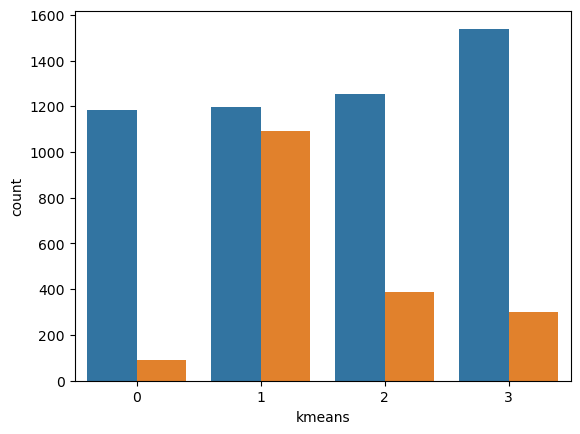

In [240]:
sns.countplot(data=df,x='kmeans', hue='Churn_num')


In [254]:
df.loc[df['kmeans']==1].describe().T['mean'].reset_index()

,index,mean
0,SeniorCitizen,0.208643
1,Churn_num,0.477084
2,tenure_min_max,0.176148
3,tenure_standard,-0.801665
4,Partnernum,0.312091
5,Dependentsnum,0.186818
6,PhoneServicenum,0.905718
7,PaperlessBillingnum,1.000000
8,Internet_speed,0.729812
9,MonthlyCharges_mm,0.415198


In [244]:
df.groupby(by='kmeans').agg({'Churn_num':'mean'})

# 평균 대비 이탈률이 높은 그룹 1
# 평균 대비 이탈률이 낮은 그룹 0

,Churn_num
kmeans,
0,0.071429
1,0.477084
2,0.235366
3,0.162677


In [256]:
df.loc[df['kmeans']==0][features].describe().T['mean'].reset_index()

,index,mean
0,SeniorCitizen,0.044741
1,tenure_min_max,0.793694
2,tenure_standard,1.008769
3,Partnernum,0.939560
4,Dependentsnum,0.934066
5,PhoneServicenum,0.912873
6,PaperlessBillingnum,0.493721
7,Internet_speed,0.492543
8,MonthlyCharges_mm,0.371992
9,TotalCharges_mm,0.417868


In [282]:
for_plot = df.loc[df['kmeans']==1][features].describe().T['mean'].reset_index()
for_plot = for_plot.sort_values('mean', ascending=False)

# paperlessBilling, phoneservice 가 활성화 된 그룹이 

<Axes: xlabel='mean', ylabel='index'>

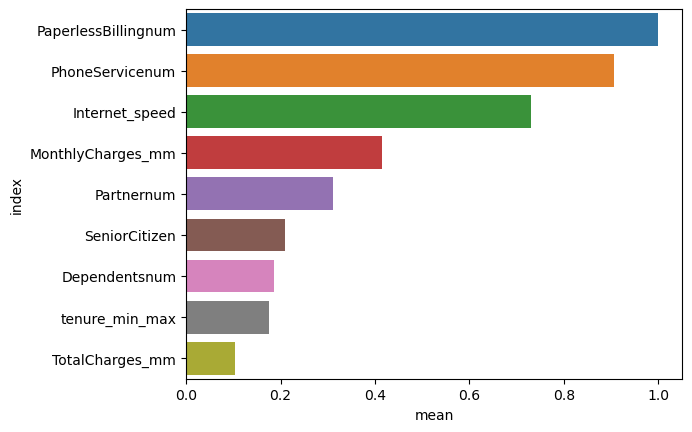

In [284]:
sns.barplot(data=for_plot, x='mean', y='index')

#### 그룹화 할때, 군집의 개수를 지정하는 방법
- 군집의 개수를 정해놓은 경우 or 미리 알고 있는 경우
- 실루엣 지표 등 이상적인 그룹과 그렇지 않은 그룹일 때의 수치값의 비교가 가능한 평가지표를 이용
- 그래프를 그림(scree plot, elbow method)

In [286]:
from sklearn.metrics import silhouette_score as sil

In [304]:
model = km(n_clusters=2)
features = ['tenure_min_max', 'MonthlyCharges_mm', 'TotalCharges_mm']
model.fit(df[features])

C:\Users\405-11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [305]:
sil(df[features], model.labels_)

0.48722972201392645

In [324]:
cluster = []
scores = []
elbow_score = []
for i in range(2,16):
    model = km(n_clusters=i)
    features = ['tenure_min_max', 'MonthlyCharges_mm', 'TotalCharges_mm']
    model.fit(df[features])
    elbow_score.append(model.inertia_)
    cluster.append(i)
    scores.append(sil(df[features], model.labels_))

test = pd.DataFrame()
test['n_cluster'] = cluster
test['score'] = scores
test['elbow_score'] = elbow_score

C:\Users\405-11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\405-11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\405-11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\405-11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\405-11\anaconda3\Lib\site-packages\sklearn\

C:\Users\405-11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\405-11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='n_cluster', ylabel='elbow_score'>

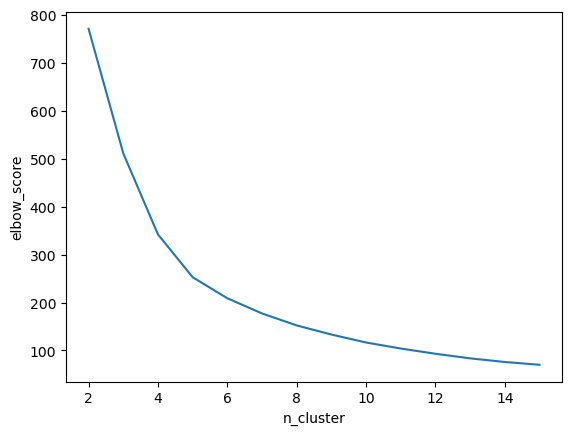

In [334]:
sns.lineplot(data=test, x='n_cluster', y='elbow_score')

C:\Users\405-11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\405-11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='n_cluster', ylabel='score'>

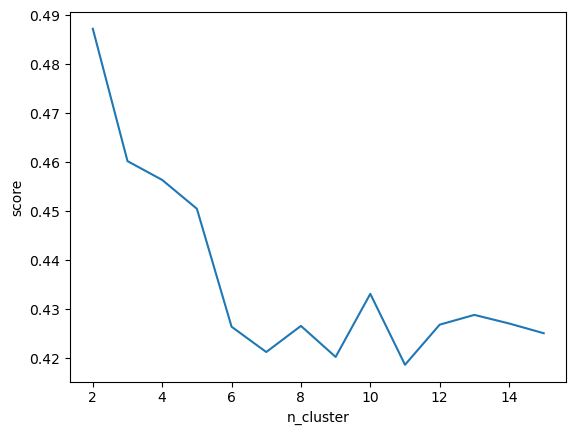

In [336]:
sns.lineplot(data=test, x='n_cluster', y='score')

In [338]:
test
# 실루엣 점수는 2일때 가장 높게 나옴
# 5개의 클러스터일때 기울기의 변화가 가장 큼 최적의 클러스터

,n_cluster,score,elbow_score
0,2,0.487258,770.976957
1,3,0.460212,511.158709
2,4,0.456371,342.146878
3,5,0.450483,252.840176
4,6,0.426376,208.966550
5,7,0.421203,177.299204
6,8,0.426544,152.288610
7,9,0.420200,133.324428
8,10,0.433096,116.712297
9,11,0.418599,104.125106


#### 차원축소(Dimensionality Reduction)
- 대표적인 알고리즘: PCA, 
- feature의 개수를 줄이는 거싱지만 feature selection과는 의미가 다르다
- 차원 축소를 하면 feature 가 더 이상 feature의 의미를 갖지 않음
- 만약, 원본 데이터가 100개의 column으로 구성,
- 이데이터의 정보를 전부 표현하기 위해 100개의 컬럼이 필요, 차원축소 개념을 이용하면 10개 미만(80% ~ 90%)정보 표현이 가능함,
- 100개 중에서 중요한 몇개를 사용(선별)하는 것이 아니라 100개를 조금씩 조합해서 새로운 feature를 만들어 내는 것
- 데이터의 정보를 최대한 유지하면서 column의 개수를 n개로 줄어들게 함 -> 기존의 column의 정보나 특성이 사라지게 됨

In [346]:
from sklearn.decomposition import PCA

In [348]:
model = PCA(n_components=2)

In [356]:
df_dr = pd.DataFrame(model.fit_transform(df[features]), columns=['pc1', 'pc2'])

In [354]:
model.components_

# pc1,2 를 구정하는데 각 컬럼의 데이터가 얼마맡큼 쓰였느냐 라는 의미

array([[ 0.7347154 ,  0.33956739,  0.58727103],
       [ 0.51333756, -0.84424392, -0.15406737]])

In [360]:
cluster = []
scores = []
elbow_score = []
for i in range(2,16):
    model = km(n_clusters=i)
    features = ['pc1', 'pc2']
    model.fit(df_dr[features])
    elbow_score.append(model.inertia_)
    cluster.append(i)
    scores.append(sil(df_dr[features], model.labels_))

test = pd.DataFrame()
test['n_cluster'] = cluster
test['score'] = scores
test['elbow_score'] = elbow_score

C:\Users\405-11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\405-11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\405-11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\405-11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\405-11\anaconda3\Lib\site-packages\sklearn\

C:\Users\405-11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\405-11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='n_cluster', ylabel='elbow_score'>

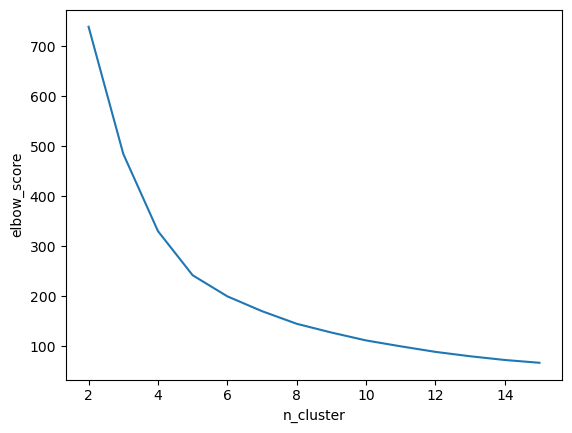

In [361]:
sns.lineplot(data=test, x='n_cluster', y='elbow_score')

In [364]:
test

,n_cluster,score,elbow_score
0,2,0.494227,738.631291
1,3,0.465506,484.584644
2,4,0.453304,330.189208
3,5,0.450350,241.975709
4,6,0.425810,199.810965
5,7,0.422876,170.158825
6,8,0.426352,144.949056
7,9,0.431399,127.455043
8,10,0.431509,111.671141
9,11,0.424424,99.873207
